<a href="https://colab.research.google.com/github/Lamin-Tamang/Sentiment-Analysis-on-IMDB-Dataset-of-50K-Movie-Reviews/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis on IMDB Dataset of 50K Movie Reviews using Naive Bayes**


## **Objective:**

- To perform sentiment analysis for the IMDB movie review dataset consisting of 50,000 reviews with positive or negative labels.

- The Naive Bayes classification algorithm is used to predict the sentiment of each review.


## **Why I Chose Naive Bayes:**

- Supervised dataset with labeled sentiments i.e, positive or negative

- Well suited for text classification tasks

- Works efficiently with high-dimensional word data

- Fast training and low computational cost

- Simple to implement and interpret



## **Dataset Overview**

Source : Kaggle IMDB Dataset

Size : 50,000 movie reviews

Format : Each review is labeled as either positive or negative.



### Install kaggle library


In [ ]:
!pip install kaggle

### Upload the Kaggle.json file


In [32]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Import IMDB Dataset of 50K Movie Reviews using API


In [33]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 677MB/s]


### Extract the compressed dataset


In [34]:
import zipfile

dataset = '/content/imdb-dataset-of-50k-movie-reviews.zip'

with zipfile.ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


### Import dependencies


In [35]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


## **Data Preprocessing**


In [37]:
# loading data from csv file
data=pd.read_csv('/content/IMDB Dataset.csv',encoding='ISO-8859-1')

In [38]:
# checking number of rows and columns
data.shape

(50000, 2)

In [39]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
# Checking missing values
data.isnull().sum()

,0
review,0
sentiment,0


In [41]:
# checking number of Positive and negative sentiments
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


### Convert the sentiment to 0 and 1

0-->negative review

1-->positive review

In [42]:
data.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

<ipython-input-42-52814477>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)


In [43]:
# checking number of Positive and negative sentiments
data['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


## **Stemming**

In [44]:
port_stem=PorterStemmer()

In [45]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [46]:
data['stemmed content']=data['review'].apply(stemming)

In [47]:
data.head()

,review,sentiment,stemmed content
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [48]:
# seperate data and label

X=data['stemmed content'].values
Y=data['sentiment'].values

print (X)
print (Y)

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

### **Split into train and test data**

In [49]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

### **Encoding using TfidfVectorizer**

In [50]:
# cnvert the textul data into numerical
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [51]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3735545 stored elements and shape (40000, 62663)>
  Coords	Values
  (0, 38467)	0.05099007905915357
  (0, 48550)	0.049967514483636566
  (0, 18975)	0.07171643646853872
  (0, 19748)	0.06571609230863029
  (0, 38824)	0.07099594232589299
  (0, 52017)	0.07204195870112538
  (0, 8703)	0.14860818662904896
  (0, 62424)	0.1792106257121205
  (0, 28269)	0.12453987428365568
  (0, 34484)	0.03921959231384746
  (0, 22116)	0.02309054539032656
  (0, 8554)	0.09064643835756676
  (0, 5905)	0.17598976648970105
  (0, 28444)	0.26573397275408306
  (0, 7018)	0.08208372903640064
  (0, 19396)	0.04614861805138834
  (0, 57998)	0.10340866064061564
  (0, 22793)	0.14813061410624942
  (0, 53389)	0.3170754747655155
  (0, 17142)	0.07442216184012655
  (0, 61478)	0.02513619753779331
  (0, 48476)	0.0611047090660409
  (0, 15835)	0.05677649360365178
  (0, 1599)	0.08504854180756685
  (0, 2217)	0.0480464504397811
  :	:
  (39999, 4519)	0.11946224775010661
  (39999, 2688

## Training Machine Learning Model



In [54]:
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

## Evaluation the Model




In [78]:
# Calculate accuracy score of training data
X_train_predicion=model.predict(X_train)
train_accuracy=accuracy_score(Y_train, X_train_predicion)
print("Accuracy score of training data:",train_accuracy)

Accuracy score of training data: 0.896525


In [65]:
# Calculate accuracy score on test data
X_test_predicion=model.predict(X_test)
train_accuracy=accuracy_score(Y_test, X_test_predicion)
print("Accuracy score of test data:",train_accuracy)

Accuracy score of test data: 0.8555


**Model accuracy = 85.5%**

## Saving the trained model

In [66]:
import pickle

In [67]:
filename = "trained_model.sav"
pickle.dump(model,open(filename,'wb'))

## Using the saved model for future predictions

In [68]:
# load the saved model
loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

In [82]:
X_new = X_test[999]
print("Acutal value:",Y_test[999])

prediction= model.predict(X_new)
print("Predicted value:",prediction)

if (prediction[0]==0):
  print('Negative Review')
else:
  print('Positive Review')

Acutal value: 1
Predicted value: [1]
Positive Review


In [83]:
X_new = X_test[10]
print("Acutal value:",Y_test[15])

prediction= model.predict(X_new)
print("Predicted value:",prediction)

if (prediction[0]==0):
  print('Negative Review')
else:
  print('Positive Review')

Acutal value: 1
Predicted value: [0]
Negative Review


## Visualize the model performance

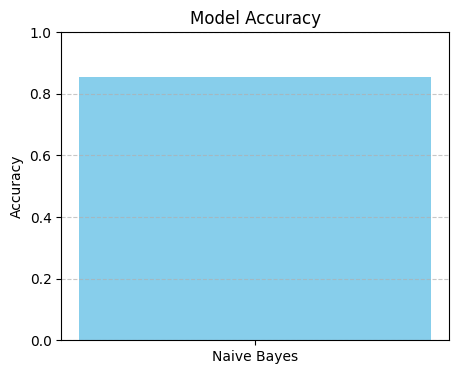

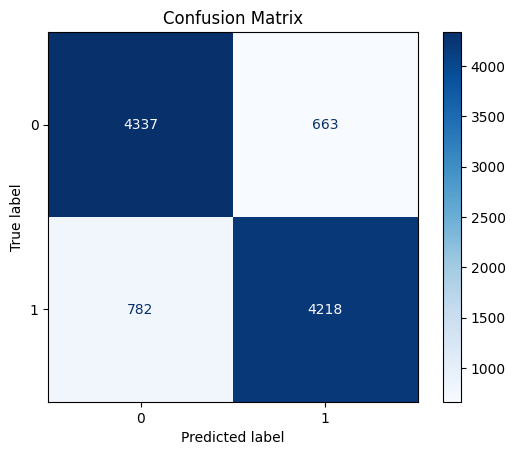

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

# 1For Accuracy Plot
plt.figure(figsize=(5, 4))
plt.bar(['Naive Bayes'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# For Confusion Matrix Plot
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()
